## 十分钟入门 Pandas

In [1]:
# learn_pandas
#
# created by LuYF-Lemon-love <luyanfeng_nlp@qq.com> on November 27, 2022
# updated by LuYF-Lemon-love <luyanfeng_nlp@qq.com> on February 3, 2023
#
# 参考文档链接: https://www.pypandas.cn/docs/getting_started/10min.html

## 导入 Pandas 与 NumPy

In [2]:
import numpy as np
import pandas as pd

## 生成对象

用**列表**生成 **Series** 时，**Pandas** 默认**自动生成整数索引**：

In [3]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

用含**日期时间索引**与**标签 (列名)**的 **NumPy 数组**生成 **DataFrame** ：

In [4]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.292249,0.135458,0.671842,-0.694057
2013-01-02,-0.150757,1.503017,0.363500,0.598962
2013-01-03,-1.263080,0.535759,0.146563,0.006200
2013-01-04,-1.638435,-0.632221,-2.017911,-0.914950
2013-01-05,0.048524,0.903607,0.152078,-0.660937
2013-01-06,0.743112,-1.144634,-0.059587,0.043545


用 **Series** **字典**对象生成 **DataFrame**：

In [6]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


**DataFrame** 的**列**有**不同数据类型**。

In [7]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

**IPython** 支持 **tab** 键**自动补全列名与公共属性**。列 **A**、**B**、**C**、**D** 和 **E** 都可以**自动补全**。

## 查看数据

查看 **DataFrame** **头部**和**尾部**数据：

In [8]:
df.head()

,A,B,C,D
2013-01-01,0.292249,0.135458,0.671842,-0.694057
2013-01-02,-0.150757,1.503017,0.363500,0.598962
2013-01-03,-1.263080,0.535759,0.146563,0.006200
2013-01-04,-1.638435,-0.632221,-2.017911,-0.914950
2013-01-05,0.048524,0.903607,0.152078,-0.660937


In [9]:
df.tail(3)

,A,B,C,D
2013-01-04,-1.638435,-0.632221,-2.017911,-0.914950
2013-01-05,0.048524,0.903607,0.152078,-0.660937
2013-01-06,0.743112,-1.144634,-0.059587,0.043545


显示**索引**与**列名**：

In [10]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

**DataFrame.to_numpy()** 输出底层数据的 **NumPy** 对象。注意，**DataFrame** 的列由**多种数据类型**组成时，该操作**耗费系统资源较大**，这也是 **Pandas** 和 **NumPy** 的本质区别：**NumPy 数组只有一种数据类型，DataFrame 每列的数据类型各不相同**。调用 **DataFrame.to_numpy()** 时，**Pandas** 查找**支持 DataFrame 里所有数据类型**的 **NumPy 数据类型**。还有一种数据类型是 **object**，可以把 **DataFrame** 列里的值强制转换为 **Python** 对象。

下面的 **df** 这个 **DataFrame** 里的值都是**浮点数**，**DataFrame.to_numpy()** 的**操作会很快**，而且**不复制数据**。

In [12]:
df.to_numpy()

array([[ 0.29224858,  0.13545787,  0.67184157, -0.69405723],
       [-0.15075717,  1.50301681,  0.36349958,  0.59896246],
       [-1.2630797 ,  0.53575888,  0.14656327,  0.00619998],
       [-1.63843466, -0.63222072, -2.01791095, -0.91494977],
       [ 0.0485236 ,  0.90360695,  0.15207819, -0.66093738],
       [ 0.74311191, -1.14463421, -0.05958697,  0.04354505]])

**df2** 这个 **DataFrame** 包含了**多种类型**，**DataFrame.to_numpy()** 操作会**耗费较多资源**。

In [13]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

>**DataFrame.to_numpy()** 的**输出**不包含**行索引**和**列标签**。

**describe()** 可以**快速查看数据的统计摘要**：

In [14]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.328065,0.216831,-0.123919,-0.270206
std,0.927015,0.980688,0.960364,0.579363
min,-1.638435,-1.144634,-2.017911,-0.914950
25%,-0.984999,-0.440301,-0.008049,-0.685777
50%,-0.051117,0.335608,0.149321,-0.327369
75%,0.231317,0.811645,0.310644,0.034209
max,0.743112,1.503017,0.671842,0.598962


转置数据：

In [15]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.292249,-0.150757,-1.263080,-1.638435,0.048524,0.743112
B,0.135458,1.503017,0.535759,-0.632221,0.903607,-1.144634
C,0.671842,0.363500,0.146563,-2.017911,0.152078,-0.059587
D,-0.694057,0.598962,0.006200,-0.914950,-0.660937,0.043545


按轴排序：

In [16]:
'''
    Parameters
    ----------
    axis : {0 or 'index', 1 or 'columns'}, default 0
        The axis along which to sort.  The value 0 identifies the rows,
        and 1 identifies the columns.
'''

df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.694057,0.671842,0.135458,0.292249
2013-01-02,0.598962,0.363500,1.503017,-0.150757
2013-01-03,0.006200,0.146563,0.535759,-1.263080
2013-01-04,-0.914950,-2.017911,-0.632221,-1.638435
2013-01-05,-0.660937,0.152078,0.903607,0.048524
2013-01-06,0.043545,-0.059587,-1.144634,0.743112


按值排序：

In [17]:
'''
    Parameters
    ----------
            by : str or list of str
                Name or list of names to sort by.
    
                - if `axis` is 0 or `'index'` then `by` may contain index
                  levels and/or column labels.
                - if `axis` is 1 or `'columns'` then `by` may contain column
                  levels and/or index labels.
    axis : {0 or 'index', 1 or 'columns'}, default 0
         Axis to be sorted.
'''

df.sort_values(by='B')

,A,B,C,D
2013-01-06,0.743112,-1.144634,-0.059587,0.043545
2013-01-04,-1.638435,-0.632221,-2.017911,-0.914950
2013-01-01,0.292249,0.135458,0.671842,-0.694057
2013-01-03,-1.263080,0.535759,0.146563,0.006200
2013-01-05,0.048524,0.903607,0.152078,-0.660937
2013-01-02,-0.150757,1.503017,0.363500,0.598962


## 选择

选择、设置标准 **Python / Numpy** 的表达式已经非常直观，交互也很方便，但对于**生产代码**，还是**推荐优化过的 Pandas 数据访问方法**：**.at**、**.iat**、**.loc** 和 **.iloc**。

### 获取数据

选择**单列**，产生 **Series**，与 **df.A** 等效：

In [18]:
df['A']

2013-01-01    0.292249
2013-01-02   -0.150757
2013-01-03   -1.263080
2013-01-04   -1.638435
2013-01-05    0.048524
2013-01-06    0.743112
Freq: D, Name: A, dtype: float64

用 **[]** 切片**行**：

In [19]:
df[0:3]

,A,B,C,D
2013-01-01,0.292249,0.135458,0.671842,-0.694057
2013-01-02,-0.150757,1.503017,0.363500,0.598962
2013-01-03,-1.263080,0.535759,0.146563,0.006200


In [20]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.150757,1.503017,0.363500,0.598962
2013-01-03,-1.263080,0.535759,0.146563,0.006200
2013-01-04,-1.638435,-0.632221,-2.017911,-0.914950


In [21]:
df['2013-01-02':'2013-01-04']

,A,B,C,D
2013-01-02,-0.150757,1.503017,0.363500,0.598962
2013-01-03,-1.263080,0.535759,0.146563,0.006200
2013-01-04,-1.638435,-0.632221,-2.017911,-0.914950


In [22]:
df['2013/01/02':'2013/01/04']

,A,B,C,D
2013-01-02,-0.150757,1.503017,0.363500,0.598962
2013-01-03,-1.263080,0.535759,0.146563,0.006200
2013-01-04,-1.638435,-0.632221,-2.017911,-0.914950


### 按标签选择

用**标签**提取**一行数据**：

In [23]:
df.loc[dates[0]]

A    0.292249
B    0.135458
C    0.671842
D   -0.694057
Name: 2013-01-01 00:00:00, dtype: float64

用**标签**选择**多列数据**：

In [24]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,0.292249,0.135458
2013-01-02,-0.150757,1.503017
2013-01-03,-1.263080,0.535759
2013-01-04,-1.638435,-0.632221
2013-01-05,0.048524,0.903607
2013-01-06,0.743112,-1.144634


用**标签切片**，包含**行**与**列**结束点：

In [25]:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,-0.150757,1.503017
2013-01-03,-1.263080,0.535759
2013-01-04,-1.638435,-0.632221


返回对象：

In [26]:
df.loc['20130102', ['A', 'B']]

A   -0.150757
B    1.503017
Name: 2013-01-02 00:00:00, dtype: float64

提取标量值：

In [27]:
df.loc[dates[0], 'A']

0.29224858104309415

快速访问标量，与上述方法等效：

In [28]:
df.at[dates[0], 'A']

0.29224858104309415

### 按位置选择

用**整数位置**选择：

In [29]:
df.iloc[3]

A   -1.638435
B   -0.632221
C   -2.017911
D   -0.914950
Name: 2013-01-04 00:00:00, dtype: float64

类似 **NumPy / Python**，用**整数切片**：

In [30]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-1.638435,-0.632221
2013-01-05,0.048524,0.903607


类似 **NumPy / Python**，用**整数列表**按**位置切片**：

In [31]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-0.150757,0.363500
2013-01-03,-1.263080,0.146563
2013-01-05,0.048524,0.152078


显式**整行切片**：

In [32]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.150757,1.503017,0.363500,0.598962
2013-01-03,-1.263080,0.535759,0.146563,0.006200


显式**整列切片**：

In [33]:
df.iloc[:, 1:3]

,B,C
2013-01-01,0.135458,0.671842
2013-01-02,1.503017,0.363500
2013-01-03,0.535759,0.146563
2013-01-04,-0.632221,-2.017911
2013-01-05,0.903607,0.152078
2013-01-06,-1.144634,-0.059587


显式**提取值**：

In [34]:
df.iloc[1, 1]

1.5030168095950422

快速**访问标量**，与**上述方法**等效：

In [35]:
df.iat[1, 1]

1.5030168095950422

### 布尔索引

用**单列的值**选择数据：

In [36]:
df[df.A > 0]

,A,B,C,D
2013-01-01,0.292249,0.135458,0.671842,-0.694057
2013-01-05,0.048524,0.903607,0.152078,-0.660937
2013-01-06,0.743112,-1.144634,-0.059587,0.043545


选择 **DataFrame** 里**满足条件**的值：

In [37]:
df[df > 0]

,A,B,C,D
2013-01-01,0.292249,0.135458,0.671842,NaN
2013-01-02,NaN,1.503017,0.363500,0.598962
2013-01-03,NaN,0.535759,0.146563,0.006200
2013-01-04,NaN,NaN,NaN,NaN
2013-01-05,0.048524,0.903607,0.152078,NaN
2013-01-06,0.743112,NaN,NaN,0.043545


用 **isin()** 筛选：

In [38]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,0.292249,0.135458,0.671842,-0.694057,one
2013-01-02,-0.150757,1.503017,0.363500,0.598962,one
2013-01-03,-1.263080,0.535759,0.146563,0.006200,two
2013-01-04,-1.638435,-0.632221,-2.017911,-0.914950,three
2013-01-05,0.048524,0.903607,0.152078,-0.660937,four
2013-01-06,0.743112,-1.144634,-0.059587,0.043545,three


In [39]:
'''
    Whether elements in Series are contained in `values`.
    
    Return a boolean Series showing whether each element in the Series
    matches an element in the passed sequence of `values` exactly.
    
    Parameters
    ----------
    values : set or list-like
        The sequence of values to test. Passing in a single string will
        raise a ``TypeError``. Instead, turn a single string into a
        list of one element.
'''

df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,-1.263080,0.535759,0.146563,0.006200,two
2013-01-05,0.048524,0.903607,0.152078,-0.660937,four


### 赋值

用**索引**自动对齐**新增列的数据**：

In [40]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,0.292249,0.135458,0.671842,-0.694057,NaN
2013-01-02,-0.150757,1.503017,0.363500,0.598962,1.0
2013-01-03,-1.263080,0.535759,0.146563,0.006200,2.0
2013-01-04,-1.638435,-0.632221,-2.017911,-0.914950,3.0
2013-01-05,0.048524,0.903607,0.152078,-0.660937,4.0
2013-01-06,0.743112,-1.144634,-0.059587,0.043545,5.0


按**标签赋值**：

In [41]:
df.at[dates[0], 'A'] = 0

按**位置赋值**：

In [42]:
df.iat[0, 1] = 0

按 **NumPy 数组**赋值：

In [43]:
df.loc[:, 'D'] = np.array([5] * len(df))

上述**赋值结果**：

In [44]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.671842,5,NaN
2013-01-02,-0.150757,1.503017,0.363500,5,1.0
2013-01-03,-1.263080,0.535759,0.146563,5,2.0
2013-01-04,-1.638435,-0.632221,-2.017911,5,3.0
2013-01-05,0.048524,0.903607,0.152078,5,4.0
2013-01-06,0.743112,-1.144634,-0.059587,5,5.0


用 **where** 条件赋值：

In [45]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.671842,-5,NaN
2013-01-02,-0.150757,-1.503017,-0.363500,-5,-1.0
2013-01-03,-1.263080,-0.535759,-0.146563,-5,-2.0
2013-01-04,-1.638435,-0.632221,-2.017911,-5,-3.0
2013-01-05,-0.048524,-0.903607,-0.152078,-5,-4.0
2013-01-06,-0.743112,-1.144634,-0.059587,-5,-5.0


## 缺失值

**Pandas** 主要用 **np.nan** 表示**缺失数据**。计算时，默认不包含空值。

**重建索引**（reindex）可以**更改**、**添加**、**删除**指定轴的索引，并**返回数据副本**，即不更改原数据。

In [46]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.671842,5,NaN,1.0
2013-01-02,-0.150757,1.503017,0.363500,5,1.0,1.0
2013-01-03,-1.263080,0.535759,0.146563,5,2.0,NaN
2013-01-04,-1.638435,-0.632221,-2.017911,5,3.0,NaN


**删除**所有**含缺失值的行**：

In [47]:
'''
    Remove missing values.
    
    Parameters
    ----------
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Determine if rows or columns which contain missing values are
        removed.
    
        * 0, or 'index' : Drop rows which contain missing values.
        * 1, or 'columns' : Drop columns which contain missing value.
    
        .. versionchanged:: 1.0.0
    
           Pass tuple or list to drop on multiple axes.
           Only a single axis is allowed.
    
    how : {'any', 'all'}, default 'any'
        Determine if row or column is removed from DataFrame, when we have
        at least one NA or all NA.
    
        * 'any' : If any NA values are present, drop that row or column.
        * 'all' : If all values are NA, drop that row or column.
'''

df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-0.150757,1.503017,0.3635,5,1.0,1.0


填充缺失值：

In [48]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.671842,5,5.0,1.0
2013-01-02,-0.150757,1.503017,0.363500,5,1.0,1.0
2013-01-03,-1.263080,0.535759,0.146563,5,2.0,5.0
2013-01-04,-1.638435,-0.632221,-2.017911,5,3.0,5.0


提取 **nan** 值的**布尔掩码**：

In [49]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## 运算

### 统计

一般情况下，运算时**排除缺失值**。

描述性统计：

In [50]:
df.mean()

A   -0.376773
B    0.194255
C   -0.123919
D    5.000000
F    3.000000
dtype: float64

在**另一个轴(即，行)**上执行同样的操作：

In [51]:
df.mean(1)

2013-01-01    1.417960
2013-01-02    1.543152
2013-01-03    1.283848
2013-01-04    0.742287
2013-01-05    2.020842
2013-01-06    1.907778
Freq: D, dtype: float64

**不同维度对象运算**时，**要先对齐**。 此外，**Pandas** 自动**沿指定维度广播**。

In [52]:
'''
    Examples
    --------
    >>> df = pd.DataFrame({"Col1": [10, 20, 15, 30, 45],
    ...                    "Col2": [13, 23, 18, 33, 48],
    ...                    "Col3": [17, 27, 22, 37, 52]},
    ...                   index=pd.date_range("2020-01-01", "2020-01-05"))
    >>> df
                Col1  Col2  Col3
    2020-01-01    10    13    17
    2020-01-02    20    23    27
    2020-01-03    15    18    22
    2020-01-04    30    33    37
    2020-01-05    45    48    52
    
    >>> df.shift(periods=3)
                Col1  Col2  Col3
    2020-01-01   NaN   NaN   NaN
    2020-01-02   NaN   NaN   NaN
    2020-01-03   NaN   NaN   NaN
    2020-01-04  10.0  13.0  17.0
    2020-01-05  20.0  23.0  27.0
    
    >>> df.shift(periods=1, axis="columns")
                Col1  Col2  Col3
    2020-01-01   NaN    10    13
    2020-01-02   NaN    20    23
    2020-01-03   NaN    15    18
    2020-01-04   NaN    30    33
    2020-01-05   NaN    45    48
    
    >>> df.shift(periods=3, fill_value=0)
                Col1  Col2  Col3
    2020-01-01     0     0     0
    2020-01-02     0     0     0
    2020-01-03     0     0     0
    2020-01-04    10    13    17
    2020-01-05    20    23    27
'''

s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [53]:
# Get Subtraction of dataframe and other, element-wise (binary operator `sub`).

df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-2.263080,-0.464241,-0.853437,4.0,1.0
2013-01-04,-4.638435,-3.632221,-5.017911,2.0,0.0
2013-01-05,-4.951476,-4.096393,-4.847922,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply 函数

**Apply** 函数处理数据：

In [54]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.671842,5,NaN
2013-01-02,-0.150757,1.503017,1.035341,10,1.0
2013-01-03,-1.413837,2.038776,1.181904,15,3.0
2013-01-04,-3.052272,1.406555,-0.836007,20,6.0
2013-01-05,-3.003748,2.310162,-0.683928,25,10.0
2013-01-06,-2.260636,1.165528,-0.743515,30,15.0


In [55]:
df.apply(lambda x: x.max() - x.min())

A    2.381547
B    2.647651
C    2.689753
D    0.000000
F    4.000000
dtype: float64

### 直方图

In [56]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    0
1    0
2    6
3    3
4    1
5    6
6    5
7    2
8    1
9    3
dtype: int64

In [57]:
s.value_counts()

0    2
6    2
3    2
1    2
5    1
2    1
dtype: int64

### 字符串方法

**Series** 的 **str** 属性包含**一组字符串处理功能**，如下列代码所示。

In [58]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## 合并（Merge）

### 结合（Concat）

**Pandas** 提供了多种**将 Series、DataFrame 对象组合**在一起的功能，用**索引**与**关联**代数功能的**多种设置逻辑**可执行**连接（join）与合并（merge）**操作。

**concat()** 用于连接 **Pandas** 对象：

In [59]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-1.354521,0.192846,-0.727339,-0.034041
1,0.107516,-0.828290,0.180786,1.484876
2,0.012355,0.837196,0.732042,-0.911103
3,1.652153,1.890284,-0.700100,-0.653101
4,-0.519017,0.744117,-0.195048,1.325139
5,1.517274,1.320626,-0.004674,-0.363802
6,-1.156519,-0.387884,-0.512121,0.598828
7,-0.747373,1.230746,0.235113,-0.513745
8,0.138308,-1.052070,1.473400,-0.577041
9,0.814749,-0.452365,-0.761879,-0.672524


In [60]:
# 分解为多组
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,-1.354521,0.192846,-0.727339,-0.034041
1,0.107516,-0.828290,0.180786,1.484876
2,0.012355,0.837196,0.732042,-0.911103
3,1.652153,1.890284,-0.700100,-0.653101
4,-0.519017,0.744117,-0.195048,1.325139
5,1.517274,1.320626,-0.004674,-0.363802
6,-1.156519,-0.387884,-0.512121,0.598828
7,-0.747373,1.230746,0.235113,-0.513745
8,0.138308,-1.052070,1.473400,-0.577041
9,0.814749,-0.452365,-0.761879,-0.672524


### 连接（join）

**SQL** 风格的合并。

In [61]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [62]:
right

,key,rval
0,foo,4
1,foo,5


In [63]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


---

In [64]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,bar,2


In [65]:
right

,key,rval
0,foo,4
1,bar,5


In [66]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### 追加（Append）

为 **DataFrame** 追加行。

In [67]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,-0.059555,0.551552,0.986791,0.146767
1,0.733478,0.324197,1.406215,-1.047326
2,0.317802,0.140192,-0.708917,0.178750
3,1.101869,-0.344626,0.470632,-0.205896
4,-1.487985,0.906266,0.315733,0.800019
5,1.259341,0.536265,-1.326837,0.464044
6,-0.725460,-0.549113,-0.485351,0.207436
7,0.652343,1.492049,-1.571347,-1.123013


In [68]:
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.059555,0.551552,0.986791,0.146767
1,0.733478,0.324197,1.406215,-1.047326
2,0.317802,0.140192,-0.708917,0.178750
3,1.101869,-0.344626,0.470632,-0.205896
4,-1.487985,0.906266,0.315733,0.800019
5,1.259341,0.536265,-1.326837,0.464044
6,-0.725460,-0.549113,-0.485351,0.207436
7,0.652343,1.492049,-1.571347,-1.123013
8,1.101869,-0.344626,0.470632,-0.205896


## 分组（Grouping）

“group by” 指的是涵盖下列一项或多项步骤的处理流程：

- **分割**：按条件把数据分割成多组；

- **应用**：为每组单独应用函数；

- **组合**：将处理结果组合成一个数据结构。

In [69]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,1.407545,-1.019876
1,bar,one,0.645548,-0.204180
2,foo,two,-0.972123,-0.459693
3,bar,three,-0.739151,-0.147397
4,foo,two,-0.286938,1.453599
5,bar,two,-0.469762,-1.037408
6,foo,one,-0.476087,0.396270
7,foo,three,1.722022,-1.518687


先分组，再用 **sum()** 函数计算每组的汇总数据：

In [70]:
df.groupby('A').sum()

,C,D
A,,
bar,-0.563365,-1.388985
foo,1.394419,-1.148387


多列**分组**后，生成**多层索引**，也可以应用 **sum** 函数：

In [71]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.645548 -0.204180
    three -0.739151 -0.147397
    two   -0.469762 -1.037408
foo one    0.931459 -0.623605
    three  1.722022 -1.518687
    two   -1.259062  0.993906

## 重塑（Reshaping）

### 堆叠（Stack）

In [72]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [73]:
'''
    Examples
    --------
    >>> tuples = [(1, 'red'), (1, 'blue'),
    ...           (2, 'red'), (2, 'blue')]
    >>> pd.MultiIndex.from_tuples(tuples, names=('number', 'color'))
    MultiIndex([(1,  'red'),
                (1, 'blue'),
                (2,  'red'),
                (2, 'blue')],
               names=['number', 'color'])
'''

index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.376494  1.087146
      two    -1.004888 -0.428386
baz   one    -1.745418  0.278875
      two     0.378097 -0.342828

**stack()** 方法把 **DataFrame** 列压缩至一层：

In [74]:
'''
    Notes
    -----
    The function is named by analogy with a collection of books
    being reorganized from being side by side on a horizontal
    position (the columns of the dataframe) to being stacked
    vertically on top of each other (in the index of the
    dataframe).
'''

stacked = df2.stack()
stacked

first  second   
bar    one     A    0.376494
               B    1.087146
       two     A   -1.004888
               B   -0.428386
baz    one     A   -1.745418
               B    0.278875
       two     A    0.378097
               B   -0.342828
dtype: float64

**压缩后**的 **DataFrame** 或 **Series** 具有多层索引，**stack()** 的逆操作是 **unstack()**，默认为**拆叠**最后一层：

In [75]:
stacked.unstack()

A         B
first second                    
bar   one     0.376494  1.087146
      two    -1.004888 -0.428386
baz   one    -1.745418  0.278875
      two     0.378097 -0.342828

In [76]:
stacked.unstack(2)

A         B
first second                    
bar   one     0.376494  1.087146
      two    -1.004888 -0.428386
baz   one    -1.745418  0.278875
      two     0.378097 -0.342828

In [77]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.376494 -1.004888
      B  1.087146 -0.428386
baz   A -1.745418  0.378097
      B  0.278875 -0.342828

In [78]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.376494 -1.745418
       B  1.087146  0.278875
two    A -1.004888  0.378097
       B -0.428386 -0.342828

## 数据透视表（Pivot Tables）

In [79]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,0.587497,0.946021
1,one,B,foo,-0.994970,0.423682
2,two,C,foo,-0.320801,-0.260043
3,three,A,bar,1.939897,1.984062
4,one,B,bar,-1.180540,-0.613177
5,one,C,bar,0.005269,-0.663243
6,two,A,foo,-1.825666,-1.722955
7,three,B,foo,-0.544749,1.934429
8,one,C,foo,-0.459340,0.012326
9,one,A,bar,0.110700,0.077156


用上述数据生成**数据透视表**非常简单：

In [80]:
help(pd.pivot_table)

Help on function pivot_table in module pandas.core.reshape.pivot:

pivot_table(data: 'DataFrame', values=None, index=None, columns=None, aggfunc: 'AggFuncType' = 'mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort=True) -> 'DataFrame'
    Create a spreadsheet-style pivot table as a DataFrame.
    
    The levels in the pivot table will be stored in MultiIndex objects
    (hierarchical indexes) on the index and columns of the result DataFrame.
    
    Parameters
    ----------
    data : DataFrame
    values : column to aggregate, optional
    index : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The
        list can contain any of the other types (except list).
        Keys to group by on the pivot table index.  If an array is passed,
        it is being used as the same manner as column values.
    columns : column, Grouper, array, or list of the previous
        If an a

In [81]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.110700  0.587497
      B -1.180540 -0.994970
      C  0.005269 -0.459340
three A  1.939897       NaN
      B       NaN -0.544749
      C  0.081196       NaN
two   A       NaN -1.825666
      B  0.427732       NaN
      C       NaN -0.320801

## 时间序列(TimeSeries)

**Pandas** 为频率转换时**重采样**提供了虽然简单易用，但强大高效的功能，如，将秒级的数据转换为 **5** 分钟为频率的数据。

In [82]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [83]:
help(np.random.randint)

Help on built-in function randint:

randint(...) method of numpy.random.mtrand.RandomState instance
    randint(low, high=None, size=None, dtype=int)
    
    Return random integers from `low` (inclusive) to `high` (exclusive).
    
    Return random integers from the "discrete uniform" distribution of
    the specified dtype in the "half-open" interval [`low`, `high`). If
    `high` is None (the default), then results are from [0, `low`).
    
    .. note::
        New code should use the ``integers`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    low : int or array-like of ints
        Lowest (signed) integers to be drawn from the distribution (unless
        ``high=None``, in which case this parameter is one above the
        *highest* such integer).
    high : int or array-like of ints, optional
        If provided, one above the largest (signed) integer to be drawn
        from the distributi

In [84]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2012-01-01 00:00:00    496
2012-01-01 00:00:01    450
2012-01-01 00:00:02     70
2012-01-01 00:00:03    498
2012-01-01 00:00:04    239
                      ... 
2012-01-01 00:01:35    352
2012-01-01 00:01:36    495
2012-01-01 00:01:37    120
2012-01-01 00:01:38    443
2012-01-01 00:01:39    430
Freq: S, Length: 100, dtype: int64

In [85]:
help(ts.resample)

Help on method resample in module pandas.core.series:

resample(rule, axis=0, closed: 'str | None' = None, label: 'str | None' = None, convention: 'str' = 'start', kind: 'str | None' = None, loffset=None, base: 'int | None' = None, on=None, level=None, origin: 'str | TimestampConvertibleTypes' = 'start_day', offset: 'TimedeltaConvertibleTypes | None' = None) -> 'Resampler' method of pandas.core.series.Series instance
    Resample time-series data.
    
    Convenience method for frequency conversion and resampling of time series.
    The object must have a datetime-like index (`DatetimeIndex`, `PeriodIndex`,
    or `TimedeltaIndex`), or the caller must pass the label of a datetime-like
    series/index to the ``on``/``level`` keyword parameter.
    
    Parameters
    ----------
    rule : DateOffset, Timedelta or str
        The offset string or object representing target conversion.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Which axis to use for up- or down-samplin

In [86]:
ts.resample('5Min').sum()

2012-01-01    27566
Freq: 5T, dtype: int64

时区表示：

In [87]:
help(pd.Series)

Help on class Series in module pandas.core.series:

class Series(pandas.core.base.IndexOpsMixin, pandas.core.generic.NDFrame)
 |  Series(data=None, index=None, dtype: 'Dtype | None' = None, name=None, copy: 'bool' = False, fastpath: 'bool' = False)
 |  
 |  One-dimensional ndarray with axis labels (including time series).
 |  
 |  Labels need not be unique but must be a hashable type. The object
 |  supports both integer- and label-based indexing and provides a host of
 |  methods for performing operations involving the index. Statistical
 |  methods from ndarray have been overridden to automatically exclude
 |  missing data (currently represented as NaN).
 |  
 |  Operations between Series (+, -, /, *, **) align values based on their
 |  associated index values-- they need not be the same length. The result
 |  index will be the sorted union of the two indexes.
 |  
 |  Parameters
 |  ----------
 |  data : array-like, Iterable, dict, or scalar value
 |      Contains data stored in Ser

In [88]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -0.306074
2012-03-07    1.617485
2012-03-08    1.682014
2012-03-09   -0.010779
2012-03-10   -1.395529
Freq: D, dtype: float64

In [89]:
help(ts.tz_localize)

Help on method tz_localize in module pandas.core.generic:

tz_localize(tz, axis=0, level=None, copy: 'bool_t' = True, ambiguous='raise', nonexistent: 'str' = 'raise') -> 'FrameOrSeries' method of pandas.core.series.Series instance
    Localize tz-naive index of a Series or DataFrame to target time zone.
    
    This operation localizes the Index. To localize the values in a
    timezone-naive Series, use :meth:`Series.dt.tz_localize`.
    
    Parameters
    ----------
    tz : str or tzinfo
    axis : the axis to localize
    level : int, str, default None
        If axis ia a MultiIndex, localize a specific level. Otherwise
        must be None.
    copy : bool, default True
        Also make a copy of the underlying data.
    ambiguous : 'infer', bool-ndarray, 'NaT', default 'raise'
        When clocks moved backward due to DST, ambiguous times may arise.
        For example in Central European Time (UTC+01), when going from
        03:00 DST to 02:00 non-DST, 02:30:00 local time o

In [90]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00   -0.306074
2012-03-07 00:00:00+00:00    1.617485
2012-03-08 00:00:00+00:00    1.682014
2012-03-09 00:00:00+00:00   -0.010779
2012-03-10 00:00:00+00:00   -1.395529
Freq: D, dtype: float64

转换成其它时区：

In [91]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.306074
2012-03-06 19:00:00-05:00    1.617485
2012-03-07 19:00:00-05:00    1.682014
2012-03-08 19:00:00-05:00   -0.010779
2012-03-09 19:00:00-05:00   -1.395529
Freq: D, dtype: float64

转换时间段：

In [92]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -0.027362
2012-02-29   -0.228838
2012-03-31   -1.406795
2012-04-30    0.116134
2012-05-31   -1.660935
Freq: M, dtype: float64

In [93]:
help(ts.to_period)

Help on method to_period in module pandas.core.series:

to_period(freq=None, copy=True) -> 'Series' method of pandas.core.series.Series instance
    Convert Series from DatetimeIndex to PeriodIndex.
    
    Parameters
    ----------
    freq : str, default None
        Frequency associated with the PeriodIndex.
    copy : bool, default True
        Whether or not to return a copy.
    
    Returns
    -------
    Series
        Series with index converted to PeriodIndex.



In [94]:
ps = ts.to_period()
ps

2012-01   -0.027362
2012-02   -0.228838
2012-03   -1.406795
2012-04    0.116134
2012-05   -1.660935
Freq: M, dtype: float64

In [95]:
help(ps.to_timestamp)

Help on method to_timestamp in module pandas.core.series:

to_timestamp(freq=None, how='start', copy=True) -> 'Series' method of pandas.core.series.Series instance
    Cast to DatetimeIndex of Timestamps, at *beginning* of period.
    
    Parameters
    ----------
    freq : str, default frequency of PeriodIndex
        Desired frequency.
    how : {'s', 'e', 'start', 'end'}
        Convention for converting period to timestamp; start of period
        vs. end.
    copy : bool, default True
        Whether or not to return a copy.
    
    Returns
    -------
    Series with DatetimeIndex



In [96]:
ps.to_timestamp()

2012-01-01   -0.027362
2012-02-01   -0.228838
2012-03-01   -1.406795
2012-04-01    0.116134
2012-05-01   -1.660935
Freq: MS, dtype: float64

**Pandas** 函数可以很方便地转换时间段与时间戳。下例把以 **11** 月为结束年份的季度频率转换为下一季度月末上午 **9** 点：

In [97]:
help(pd.period_range)

Help on function period_range in module pandas.core.indexes.period:

period_range(start=None, end=None, periods: 'int | None' = None, freq=None, name=None) -> 'PeriodIndex'
    Return a fixed frequency PeriodIndex.
    
    The day (calendar) is the default frequency.
    
    Parameters
    ----------
    start : str or period-like, default None
        Left bound for generating periods.
    end : str or period-like, default None
        Right bound for generating periods.
    periods : int, default None
        Number of periods to generate.
    freq : str or DateOffset, optional
        Frequency alias. By default the freq is taken from `start` or `end`
        if those are Period objects. Otherwise, the default is ``"D"`` for
        daily frequency.
    name : str, default None
        Name of the resulting PeriodIndex.
    
    Returns
    -------
    PeriodIndex
    
    Notes
    -----
    Of the three parameters: ``start``, ``end``, and ``periods``, exactly two
    must be spe

In [98]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts

1990Q1   -0.668886
1990Q2   -0.254167
1990Q3   -0.579724
1990Q4   -0.678091
1991Q1   -1.416634
1991Q2    0.116548
1991Q3   -0.311088
1991Q4    0.605679
1992Q1   -0.044835
1992Q2    0.424679
1992Q3    2.681100
1992Q4   -0.331403
1993Q1    2.184032
1993Q2   -0.009471
1993Q3   -0.764351
1993Q4   -1.106784
1994Q1   -1.948506
1994Q2   -0.648820
1994Q3   -1.146422
1994Q4    0.146099
1995Q1    1.273796
1995Q2    0.882585
1995Q3    0.338334
1995Q4    0.965178
1996Q1    1.000268
1996Q2   -0.337948
1996Q3   -0.703098
1996Q4    2.190322
1997Q1    1.901270
1997Q2   -1.715769
1997Q3   -0.072225
1997Q4    0.297756
1998Q1   -0.447156
1998Q2   -0.989654
1998Q3    0.650103
1998Q4    0.992651
1999Q1    0.387631
1999Q2    1.084795
1999Q3    1.300316
1999Q4   -0.013898
2000Q1    1.599642
2000Q2    0.316940
2000Q3   -0.445413
2000Q4    1.253619
Freq: Q-NOV, dtype: float64

In [99]:
help(prng.asfreq)

Help on method asfreq in module pandas.core.indexes.period:

asfreq(freq=None, how: 'str' = 'E') -> 'PeriodIndex' method of pandas.core.indexes.period.PeriodIndex instance
    Convert the PeriodArray to the specified frequency `freq`.
    
    Equivalent to applying :meth:`pandas.Period.asfreq` with the given arguments
    to each :class:`~pandas.Period` in this PeriodArray.
    
    Parameters
    ----------
    freq : str
        A frequency.
    how : str {'E', 'S'}, default 'E'
        Whether the elements should be aligned to the end
        or start within pa period.
    
        * 'E', 'END', or 'FINISH' for end,
        * 'S', 'START', or 'BEGIN' for start.
    
        January 31st ('END') vs. January 1st ('START') for example.
    
    Returns
    -------
    PeriodArray
        The transformed PeriodArray with the new frequency.
    
    See Also
    --------
    pandas.arrays.PeriodArray.asfreq: Convert each Period in a PeriodArray to the given frequency.
    Period.asfreq 

In [100]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00   -0.668886
1990-06-01 09:00   -0.254167
1990-09-01 09:00   -0.579724
1990-12-01 09:00   -0.678091
1991-03-01 09:00   -1.416634
Freq: H, dtype: float64

## 类别型（Categoricals）

**Pandas** 的 **DataFrame** 里可以包含**类别数据**。

In [101]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                   "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


将 **grade** 的**原生数据**转换为**类别型数据**：

In [102]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [103]:
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


用**有含义的名字**重命名不同类型，调用 **Series.cat.categories**。

In [104]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


重新排序各类别，并添加**缺失类**，**Series.cat** 的方法**默认**返回新 **Series**。

In [105]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium",
                                              "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [106]:
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


注意，这里是**按生成类别时的顺序排序**，不是**按词汇排序**：

In [107]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


按**类别列**分组（groupby）时，即便某类别为空，也会显示：

In [108]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## 可视化

<AxesSubplot:>

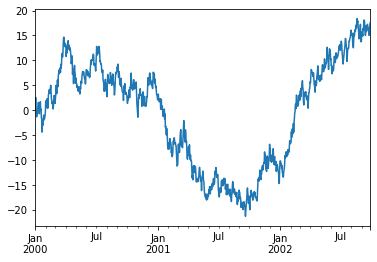

In [109]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

**DataFrame** 的 **plot()** 方法可以快速绘制**所有带标签的列**：

<AxesSubplot:>

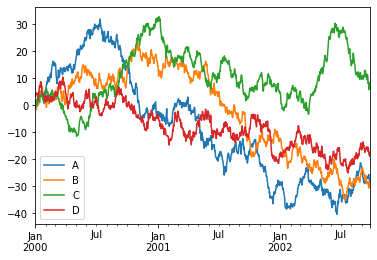

In [110]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
df.plot()

## 数据输入 / 输出

In [111]:
!mkdir -p ./output

### CSV

写入 **CSV** 文件。

In [112]:
df.to_csv('./output/foo.csv')

读取 **CSV** 文件数据：

In [113]:
pd.read_csv('./output/foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.336686,0.856988,-0.213718,3.304874
1,2000-01-02,0.230602,0.147123,1.001495,3.559882
2,2000-01-03,-0.080378,-0.521582,2.045672,4.436784
3,2000-01-04,0.250588,-1.685844,0.119852,4.161169
4,2000-01-05,-0.541848,0.117508,-0.088456,4.502560
...,...,...,...,...,...
995,2002-09-22,-25.640999,-30.581414,5.825222,-17.369774
996,2002-09-23,-27.202872,-30.600428,8.388941,-18.280810
997,2002-09-24,-27.452130,-28.757599,7.698270,-18.157057
998,2002-09-25,-28.613083,-28.374054,7.834323,-18.873611


### HDF5

写入 **HDF5 Store**：

In [114]:
help(df.to_hdf)

Help on method to_hdf in module pandas.core.generic:

to_hdf(path_or_buf, key: 'str', mode: 'str' = 'a', complevel: 'int | None' = None, complib: 'str | None' = None, append: 'bool_t' = False, format: 'str | None' = None, index: 'bool_t' = True, min_itemsize: 'int | dict[str, int] | None' = None, nan_rep=None, dropna: 'bool_t | None' = None, data_columns: 'bool_t | list[str] | None' = None, errors: 'str' = 'strict', encoding: 'str' = 'UTF-8') -> 'None' method of pandas.core.frame.DataFrame instance
    Write the contained data to an HDF5 file using HDFStore.
    
    Hierarchical Data Format (HDF) is self-describing, allowing an
    application to interpret the structure and contents of a file with
    no outside information. One HDF file can hold a mix of related objects
    which can be accessed as a group or as individual objects.
    
    In order to add another DataFrame or Series to an existing HDF file
    please use append mode and a different a key.
    
    .. warning::
    


In [115]:
df.to_hdf('./output/foo.h5', 'df')

读取 **HDF5 Store**：

In [116]:
pd.read_hdf('./output/foo.h5', 'df')

,A,B,C,D
2000-01-01,1.336686,0.856988,-0.213718,3.304874
2000-01-02,0.230602,0.147123,1.001495,3.559882
2000-01-03,-0.080378,-0.521582,2.045672,4.436784
2000-01-04,0.250588,-1.685844,0.119852,4.161169
2000-01-05,-0.541848,0.117508,-0.088456,4.502560
...,...,...,...,...
2002-09-22,-25.640999,-30.581414,5.825222,-17.369774
2002-09-23,-27.202872,-30.600428,8.388941,-18.280810
2002-09-24,-27.452130,-28.757599,7.698270,-18.157057
2002-09-25,-28.613083,-28.374054,7.834323,-18.873611


### Excel

写入 **Excel** 文件：

In [117]:
df.to_excel('./output/foo.xlsx', sheet_name='Sheet1')

读取 **Excel** 文件：

In [118]:
pd.read_excel('./output/foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.336686,0.856988,-0.213718,3.304874
1,2000-01-02,0.230602,0.147123,1.001495,3.559882
2,2000-01-03,-0.080378,-0.521582,2.045672,4.436784
3,2000-01-04,0.250588,-1.685844,0.119852,4.161169
4,2000-01-05,-0.541848,0.117508,-0.088456,4.502560
...,...,...,...,...,...
995,2002-09-22,-25.640999,-30.581414,5.825222,-17.369774
996,2002-09-23,-27.202872,-30.600428,8.388941,-18.280810
997,2002-09-24,-27.452130,-28.757599,7.698270,-18.157057
998,2002-09-25,-28.613083,-28.374054,7.834323,-18.873611


## 各种坑（Gotchas）

执行某些操作，将**触发异常**，如:

In [119]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
pd.Series([False, True, False])